# Случайные величины

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Моделирование дискретной случайной величины

In [2]:
def get_discrete_disbribution(x, p, n_trials=10):
    # генерируем числа: [0, 1)
    i = np.random.random(n_trials).reshape(-1, 1)
    # разделяем [0, 1) на отрезки, соответствующие заданным вероятностям в "p"
    l = np.cumsum(p) - p
    r = np.cumsum(p)
    mask = np.logical_and(l <= i, i < r)
    # смотрим номер отрезка, в который попало случайно сгенерированное число
    indices = np.argwhere(mask)[:, 1]
    # номер отрезка равен соответствующему значению случайной величины из "x"
    return x[indices]

In [3]:
# распределение из задачи 1
x = [ -1,   0,   1,   3]
p = [0.2, 0.5, 0.2, 0.1]

n_trials = 10**5
X = get_discrete_disbribution(np.array(x), np.array(p), n_trials=n_trials)

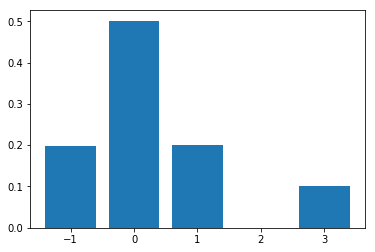

In [4]:
numbers, counter = np.unique(X, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(numbers, counter / n_trials)
plt.show()

## 2. Задача 1

Задан закон распределения дискретной случайной величины X:

|Значение|Вероятность|
|:------:|----------|
|-1|0.2|
|0|0.5|
|1|0.2|
|3|0.1|

Найти:

$$
E[2X + 3], \enspace
Var(2-3X), \enspace
P(-2 < X < 1,5), \enspace
F_X(0.2) \enspace
$$

### 1)

$$
E[2X + 3] = 2 E[X] + 3 =
2 \sum_{n=1}^{4}p_i x_i + 3 = 
2\cdot (0.2 \cdot (-1) + 0.5 \cdot 0 + 0.2 \cdot 1 + 0.1 \cdot 3) + 3 = 
2 \cdot 0.3 + 3 = 
3.6
$$

In [5]:
np.mean(2*X+3)

3.6072

### 2)

$$
Var(2-3X) = 9Var(X) =
9 \sum_{n=1}^{4}p_i(x_i-E[X])^2 = 
9 \cdot (0.2 \cdot (-1-0.3)^2 + 0.5 \cdot (0-0.3)^2 + 0.2 \cdot (1-0.3)^2 + 0.1 \cdot (3-0.3)^2) = 10.9
$$

In [6]:
np.var(2-3*X)

10.870983360000002

### 3)

$$
P(-2 < X < 1.5) = 1 - P(X=3) = 0.9
$$

In [7]:
np.mean(np.logical_and(-2 < X, X < 1.5))

0.89985

### 4)

$$
F_X(0.2) = P(X \leq 0.2) = P(X=-1) + P(X=0) = 0.7
$$

In [8]:
np.mean(X <= 0.2)

0.69892

### График $F_X(x)$

In [9]:
def get_cumulative_distr_points(x, p, x_l, x_r):
    x_np = np.array(x)
    p_np = np.array(p)
    x_ls = np.insert(x_np, 0, x_l)
    x_rs = np.append(x_np, x_r)
    ps = np.insert(np.cumsum(p_np), 0, 0)
    for i, x in enumerate(zip(x_ls, x_rs)):
        yield x, [ps[i]] * 2

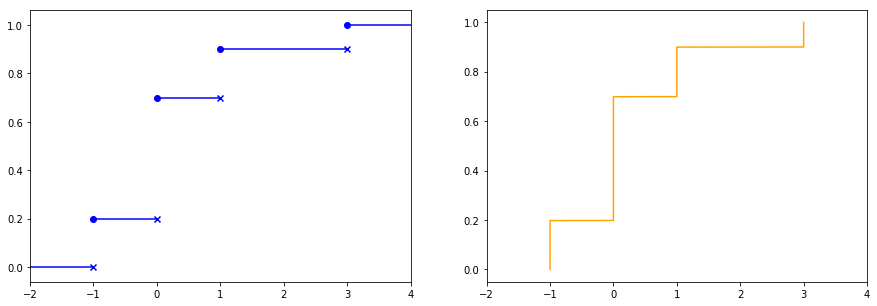

In [10]:
x_l = -2
x_r = 4

fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# функция распределения аналитическая
fig.add_subplot(gs[0, 0])
plt.scatter(x, np.cumsum(np.array(p)), marker='o', color='b')
plt.scatter(x, np.cumsum(np.array(p)) - np.array(p), marker='x', color='b')
for xx, yy in get_cumulative_distr_points(x, p, x_l, x_r):
    plt.plot(xx, yy, color='b')
plt.xlim(x_l, x_r)

# функция распределения экспериментальная
fig.add_subplot(gs[0, 1])
plt.plot(np.sort(X), np.linspace(0, 1, X.shape[0], endpoint=False), color='orange')
plt.xlim(x_l, x_r)

plt.show()

## 3. Моделирование непрерывной случайной величины

In [11]:
def compute_probs(f, x, accuracy, n=1e1):
    dx = accuracy / n
    i = np.arange(1, n+1)
    return np.sum(f(x.reshape(-1, 1) + i*dx)*dx, axis=1)

In [12]:
def get_continuous_disbribution(f, x_first, x_last, accuracy=1e-2, n_trials=10000):
    # преобразуем непрерывную случайную величину на отрезке от x_first до x_last
    # в дискретную с шагом accuracy
    x = np.arange(x_first, x_last, accuracy)
    # посчитаем площади под кривой f в точках x
    p = compute_probs(f, x, accuracy)
    # строим распределение для дискретной случайной величины
    # со значениями x и соответствующими им вероятностями p
    return get_discrete_disbribution(x, p, n_trials=n_trials)

In [13]:
# распределение из задачи 2
f = lambda x: np.where(x >= 0, 2*np.exp(-2*x), 0)

In [14]:
x_first = 0
x_last = 10

In [15]:
X = get_continuous_disbribution(f, x_first, x_last, accuracy=0.001, n_trials=10**5)

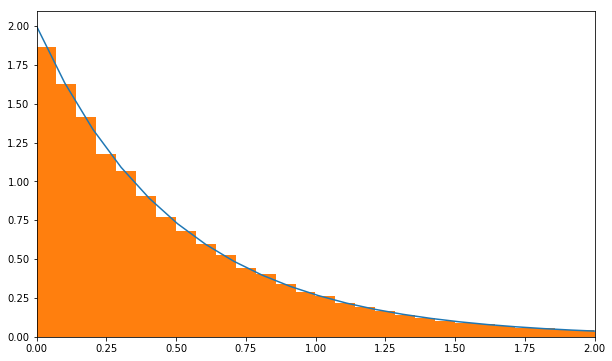

In [16]:
x_plot = np.linspace(x_first, x_last, 100)

plt.figure(figsize=(10, 6))

# плотность распределения заданная
plt.plot(x_plot, f(x_plot))
# плотность распределения экспериментальная
plt.hist(X, density=True, bins=100)

plt.xlim(0, 2)
plt.show()

## 4. Задача 2

Плотность вероятности случайной величины X имеет вид:

$$
f(x) =
\begin{cases}
0, \enspace x < 0 \\
2e^{-2x}, \enspace x \geq 0 \\
\end{cases}
$$

Найти:

$$
E[2X + 3], \enspace
Var(2-3X), \enspace
P(-2 < X < 1,5), \enspace
F_X(0.2), \enspace
F_X(x), \enspace 
x_{0.8}
$$

### 1)

$$
E[2X + 3] = 2 E[X] + 3 = 2 \int_{-\infty}^{\infty} xf(x)dx + 3 =
2 \cdot \left(
\int_{-\infty}^{0} 0 \cdot xdx + \int_{0}^{+\infty} x \cdot 2e^{-2x}dx
\right) + 3 = 
4\int_{0}^{+\infty} x e^{-2x}dx + 3
$$

$$
u' = e^{-2x} => u = -\frac{1}{2}e^{-2x}
$$ 

$$
v = x => v' = 1
$$ 

$$
\int u'vdx = uv - \int uv'dx = 
-\frac{1}{2}e^{-2x}\cdot x - \int -\frac{1}{2}e^{-2x}\cdot 1dx = 
-\frac{1}{2}e^{-2x}\cdot x - \frac{1}{4}e^{-2x} + C
$$

$$
E[2X + 3] = 
-4 \cdot \left(
\frac{1}{2}e^{-2x}\cdot x + \frac{1}{4}e^{-2x}
\right)
\Big|_{0}^{+\infty} + 3 = 2 \cdot \frac{2}{4} + 3 = 4
$$

In [17]:
np.mean(X), np.mean(2*X+3)

(0.5003515481238499, 4.000703096247699)

### 2)

$$
Var(2-3X) = 9Var(X) = 
9\int_{0}^{+\infty} \left(x - \frac{1}{2} \right)^2 \cdot 2e^{-2x}dx =
9\int_{0}^{+\infty} \left(x^2 - x + \frac{1}{4} \right) \cdot 2e^{-2x}dx
$$

$$
=
18 \cdot \left(
\int_{0}^{+\infty} x^2\cdot e^{-2x}dx - 
\int_{0}^{+\infty} x \cdot e^{-2x}dx +
\frac{1}{4} \int_{0}^{+\infty} e^{-2x}dx
\right)
$$

$$
u' = e^{-2x} => u = -\frac{1}{2}e^{-2x}
$$ 

$$
v = x^2 => v' = 2x
$$ 

$$
\int u'vdx = uv - \int uv'dx = 
-\frac{1}{2}e^{-2x}\cdot x^2 - \int -\frac{1}{2}e^{-2x}\cdot 2xdx = 
-\frac{1}{2}e^{-2x}\cdot x^2 + \int x \cdot e^{-2x} dx + C
$$

$$
Var(2-3X) =
18 \cdot \left(
-\frac{1}{2}e^{-2x}\cdot x^2 \Big|_{0}^{+\infty} +
\int_{0}^{+\infty} x \cdot e^{-2x}dx -
\int_{0}^{+\infty} x \cdot e^{-2x}dx +
\frac{1}{4} \int_{0}^{+\infty} e^{-2x}dx
\right) = 
$$

$$
=
\frac{18}{4} \cdot 
\int_{0}^{+\infty} e^{-2x}dx = 
\frac{9}{2} \cdot 
\left(
-\frac{1}{2}e^{-2x}
\right) \Big|_{0}^{+\infty} = \frac{9}{4} = 2.25
$$

In [18]:
np.var(2-3*X)

2.264871986633162

### 3)

$$
P(-2 < X < 1.5) = \int_{-2}^{1.5}2e^{-2x}dx = 2\int_{0}^{1.5}e^{-2x}dx =
$$

$$
= 
2 \cdot \left(
-\frac{1}{2}e^{-2x}
\right) \Big|_{0}^{1.5}
= -e^{-3} + 1
$$

In [19]:
np.mean(np.logical_and(-2 < X, X < 1.5)), -np.exp(-3) + 1

(0.9503760300824066, 0.950212931632136)

### 4)

$$
F_X(0.2) = P(X \leq 0.2) = \int_{-\infty}^{0.2}2e^{-2x}dx = 
$$

$$
= 
2 \cdot \left(
-\frac{1}{2}e^{-2x}
\right) \Big|_{0}^{0.2}
= -e^{-0.4} + 1
$$

In [20]:
np.mean(X <= 0.2), -np.exp(-0.4) + 1

(0.33173653892311383, 0.3296799539643607)

### 5)

$$
x_{0.8}: P(X \leq x_{0.8}) = 0.8 => \int_{0}^{x_{0.8}}2e^{-2x}dx = 0.8
$$

$$
2 \cdot \left(
-\frac{1}{2}e^{-2x}
\right) \Big|_{0}^{x_{0.8}}
= 0.8
$$

$$
-e^{-2x_{0.8}} + 1
= 0.8
$$

$$
-2x_{0.8}
= \ln 0.2 =>
x_{0.8} = -\frac{1}{2}\ln 0.2
$$

In [21]:
np.mean(X <= -0.5*np.log(0.2))

0.7986638931114489